#  Инициализация весов нейронных сетей. Способы регуляризации нейронных сетей. Продвинутые алгоритмы градиентного спуска.

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.init.html
* https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/
* https://machinelearningmastery.com/batch-normalization-for-training-of-deep-neural-networks/
* https://pytorch.org/docs/stable/optim.html

## Задачи для совместного разбора

1\. Инициализируйте веса полносвязного слоя единицами, а смещения - нулями.

In [ ]:
import torch
import torch.nn as nn

layer = nn.Linear(3, 2)

print("Веса до", layer.weight)
print("Смещения до:", layer.bias)

nn.init.ones_(layer.weight)
nn.init.zeros_(layer.bias)
print("Веса после:", layer.weight)
print("Смещения после:", layer.bias)


Веса до Parameter containing:
tensor([[ 0.0793, -0.3588, -0.1118],
        [ 0.2908,  0.4878,  0.0511]], requires_grad=True)
Смещения до: Parameter containing:
tensor([-0.3991, -0.2103], requires_grad=True)
Веса после: Parameter containing:
tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
Смещения после: Parameter containing:
tensor([0., 0.], requires_grad=True)


2\. Изучите, как работает слой `nn.Dropout` в режиме обучения модели и в режиме использования модели.

In [ ]:
input_tensor = torch.ones(1, 10)
dropout_layer = nn.Dropout(p=0.5)

dropout_layer.train()
print("Входной тензор:", input_tensor)
output_train = dropout_layer(input_tensor)
print("Выходной тензор:", output_train)

dropout_layer.eval()
print("Входной тензор:", input_tensor)
output_eval = dropout_layer(input_tensor)
print("Выходной тензор:", output_eval)

Входной тензор: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Выходной тензор: tensor([[2., 2., 2., 2., 2., 0., 2., 2., 2., 2.]])
Входной тензор: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Выходной тензор: tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


3\. Изучите, как работает слой `nn.BatchNorm1d` в режиме обучения модели и в режиме использования модели.

In [ ]:
bn_layer = nn.BatchNorm1d(num_features=5)
batch1 = torch.randn(2, 5) * 2 + 3
batch2 = torch.randn(2, 5) * 3 - 1

bn_layer.train()
print("running_mean до:", bn_layer.running_mean)
print("running_var до:", bn_layer.running_var)
output1 = bn_layer(batch1)
print("running_mean после1:", bn_layer.running_mean)
print("running_var после1:", bn_layer.running_var)
output2 = bn_layer(batch2)
print("running_mean после2:", bn_layer.running_mean)
print("running_var после2:", bn_layer.running_var)

bn_layer.eval()
print("Батч для проверки:")
print(batch1)
output_eval = bn_layer(batch1)
print("Выход для batch1 в режиме eval:")
print(output_eval)
print("Среднее выхода:", output_eval.mean().item())
print("Дисперсия выхода:", output_eval.var().item())


running_mean до: tensor([0., 0., 0., 0., 0.])
running_var до: tensor([1., 1., 1., 1., 1.])
running_mean после1: tensor([0.0029, 0.5715, 0.3860, 0.1620, 0.3076])
running_var после1: tensor([3.3911, 1.0218, 0.9001, 1.7015, 0.9838])
running_mean после2: tensor([-0.3281,  0.3518,  0.3701,  0.2565,  0.0418])
running_var после2: tensor([3.8098, 5.2400, 0.8103, 2.5191, 5.4234])
Батч для проверки:
tensor([[ 3.5578,  6.4948,  3.8415, -0.3816,  2.4288],
        [-3.5006,  4.9343,  3.8788,  3.6223,  3.7237]])
Выход для batch1 в режиме eval:
tensor([[ 1.9908,  2.6836,  3.8565, -0.4020,  1.0250],
        [-1.6254,  2.0019,  3.8980,  2.1206,  1.5810]],
       grad_fn=<NativeBatchNormBackward0>)
Среднее выхода: 1.7129939794540405
Дисперсия выхода: 2.971834897994995


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Расширьте класс `torch.nn.Linear`, описав класс `InitializedLinear` и добавив возможность инициализировать веса слоя при помощи функций из пакета `torch.nn.init` (инициализацию bias оставьте по умолчанию). Обратите внимание, что данные функции имеют дополнительные параметры. Данные параметры должны передаваться в момент создания объекта класса `InitializedLinear`.

Пример создания слоя:
```
InitializedLinear(n_features, n_hidden, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
```

- [ ] Проверено на семинаре

In [ ]:
import torch.nn.init as init

class InitializedLinear(nn.Linear):
    def __init__(self, in_features, out_features, init_f, init_args, **kwargs):
        super().__init__(in_features, out_features, **kwargs)
        init_f(self.weight, **init_args)

In [ ]:
layer = InitializedLinear(in_features=10, out_features=5, init_f=nn.init.uniform_, init_args={"a": 0.0, "b": 1.0})
print(layer.weight)

Parameter containing:
tensor([[0.6958, 0.9652, 0.6284, 0.9545, 0.8754, 0.0086, 0.5959, 0.8988, 0.5059,
         0.4029],
        [0.9901, 0.5480, 0.5858, 0.6309, 0.8411, 0.6312, 0.7582, 0.3309, 0.2690,
         0.0761],
        [0.0127, 0.5701, 0.2158, 0.1853, 0.8122, 0.9963, 0.8996, 0.1496, 0.5004,
         0.3533],
        [0.5133, 0.8643, 0.2169, 0.4386, 0.5595, 0.5932, 0.9203, 0.2755, 0.7064,
         0.6353],
        [0.1765, 0.1804, 0.5264, 0.5047, 0.9632, 0.2668, 0.7485, 0.3083, 0.1367,
         0.3463]], requires_grad=True)


<p class="task" id="2"></p>

2\. Решите задачу регрессии несколько раз, изменяя способ инициализации весов. Рассмотрите следующие варианты:
* `nn.init.uniform_`
* `nn.init.normal_`
* `nn.init.constant_`
* `nn.xavier_uniform_`
* `nn.kaiming_uniform_`

Визуализируйте график изменения значений MSE с ходом эпох. Дайте кривым, соответствующие разным способам инициализации, различные цвета и добавьте подписи. Для улучшения читаемости графиков можно рассматривать области экстремальных значений отдельно.

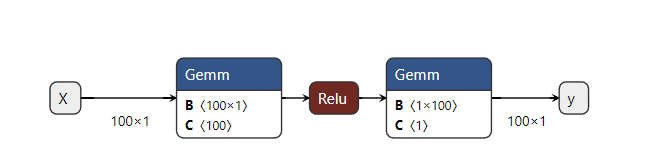

- [ ] Проверено на семинаре

In [ ]:
import torch as th
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [ ]:
X = th.linspace(0, 1, 100).view(-1, 1)
y = th.sin(2 * th.pi * X) + 0.1 * th.rand(X.size())

n_hidden = 20
n_epochs = 2000
lr = 0.01

init_methods = {
    'uniform_': (nn.init.uniform_, {'a': -0.5, 'b': 0.5}),
    'normal_': (nn.init.normal_, {'mean': 0, 'std': 0.1}),
    'constant_': (nn.init.constant_, {'val': 0.1}),
    'xavier_uniform_': (nn.init.xavier_uniform_, {}),
    'kaiming_uniform_': (nn.init.kaiming_uniform_, {})
}

history = {}

In [ ]:
for name, (init_func, init_args) in init_methods.items():
    class Net(nn.Module):
        def __init__(self, n_in, n_hidden, n_out, init_f, init_args):
            super().__init__()
            self.fc1 = InitializedLinear(n_in, n_hidden, init_f, init_args)
            self.act1 = nn.ReLU()
            self.fc2 = InitializedLinear(n_hidden, n_out, init_f, init_args)

        def forward(self, x):
            x = self.fc1(x)
            x = self.act1(x)
            x = self.fc2(x)
            return x

    model = Net(X.shape[1], n_hidden, y.shape[1], init_func, init_args)

    optimizer = th.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    epoch_history = []
    for epoch in range(n_epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        epoch_history.append(loss.item())

    history[name] = epoch_history

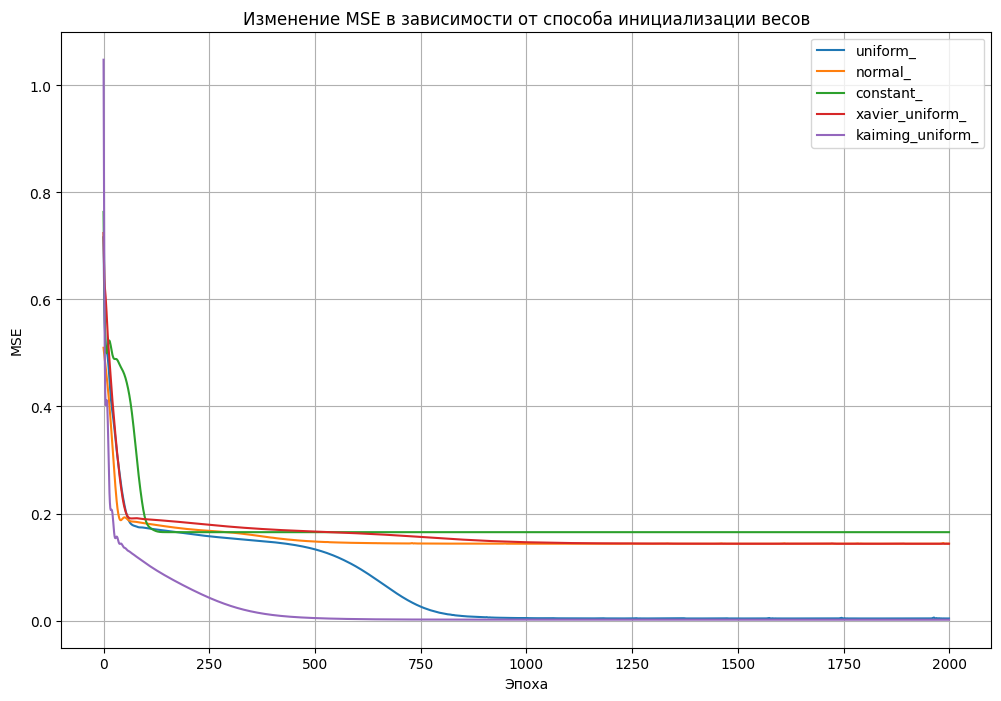

In [ ]:
plt.figure(figsize=(12, 8))
for name, losses in history.items():
    plt.plot(losses, label=name)

plt.title('Изменение MSE в зависимости от способа инициализации весов')
plt.xlabel('Эпоха')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="3"></p>

3\. Исследуйте, как добавление дропаута влияет на процесс обучения модели. Решите задачу регрессии несколько раз, изменяя значения вероятности дропаута $p$ от 0 до 0.8. В качестве модели рассмотрите нейронную сеть с одним скрытым слоем.

Визуализируйте график изменения значений $R^2$ в зависимости от вероятности дропаута $p$ на обучающей и тестовой выборке. Визуализируйте на отдельном графике зависимости разности между $R^2$ на обучающей выборки и $R^2$ на тестовой выборке.

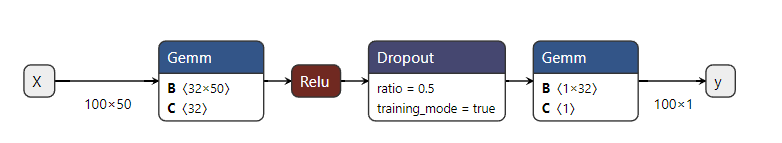

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import make_regression
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.metrics import r2_score

In [ ]:
torch.manual_seed(42)
X_np, y_np, coef = make_regression(
    n_samples=100, n_features=50, n_informative=20, noise=2, coef=True, random_state=42
)
X = torch.FloatTensor(X_np)
y = torch.FloatTensor(y_np).reshape(-1, 1)

In [ ]:
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
generator = torch.Generator().manual_seed(42)
train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=generator)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_X = test_dataset[:][0]
test_y = test_dataset[:][1]
train_X = train_dataset[:][0]
train_y = train_dataset[:][1]

In [ ]:
dropout_probs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
n_epochs = 500
lr = 0.01
n_hidden = 32
results = {'train_r2': [], 'test_r2': []}

In [ ]:
for p in dropout_probs:
    print(f"Обучение с p={p}")

    class DropoutNet(nn.Module):
        def __init__(self, n_in, n_hidden, n_out, p):
            super().__init__()
            self.fc1 = nn.Linear(n_in, n_hidden)
            self.act1 = nn.ReLU()
            self.dropout = nn.Dropout(p)
            self.fc2 = nn.Linear(n_hidden, n_out)

        def forward(self, x):
            return self.fc2(self.dropout(self.act1(self.fc1(x))))

    model = DropoutNet(X.shape[1], n_hidden, y.shape[1], p)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

    model.eval()
    with torch.no_grad():
        train_preds = model(train_X).numpy()
        test_preds = model(test_X).numpy()

    train_r2 = r2_score(train_y.numpy(), train_preds)
    test_r2 = r2_score(test_y.numpy(), test_preds)
    results['train_r2'].append(train_r2)
    results['test_r2'].append(test_r2)

Обучение с p=0
Обучение с p=0.1
Обучение с p=0.2
Обучение с p=0.3
Обучение с p=0.4
Обучение с p=0.5
Обучение с p=0.6
Обучение с p=0.7
Обучение с p=0.8


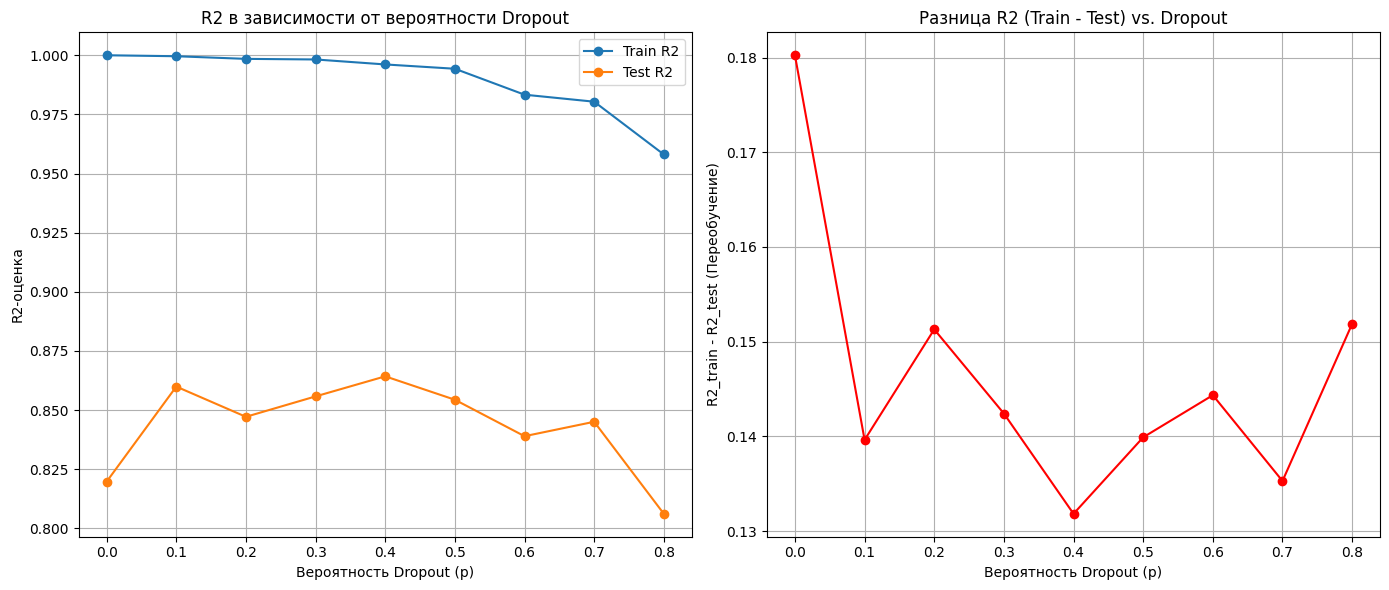

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(dropout_probs, results['train_r2'], 'o-', label='Train R2')
plt.plot(dropout_probs, results['test_r2'], 'o-', label='Test R2')
plt.title('R2 в зависимости от вероятности Dropout')
plt.xlabel('Вероятность Dropout (p)')
plt.ylabel('R2-оценка')
plt.legend()
plt.grid(True)

r2_diff = [train - test for train, test in zip(results['train_r2'], results['test_r2'])]
plt.subplot(1, 2, 2)
plt.plot(dropout_probs, r2_diff, 'o-r')
plt.title('Разница R2 (Train - Test) vs. Dropout')
plt.xlabel('Вероятность Dropout (p)')
plt.ylabel('R2_train - R2_test (Переобучение)')
plt.grid(True)

plt.tight_layout()
plt.show()

<p class="task" id="4"></p>

4\. Решите задачу регрессии с- и без использования пакетной нормализации. Покажите, как меняется результат обучения моделей при различных значениях скорости обучения (0.001, 0.01, 0.1) за одно и то же количество эпох.

Визуализируйте график изменения значений $R^2$ в зависимости от эпохи при различных значениях скорости обучения с- и без использования пакетной нормализации.

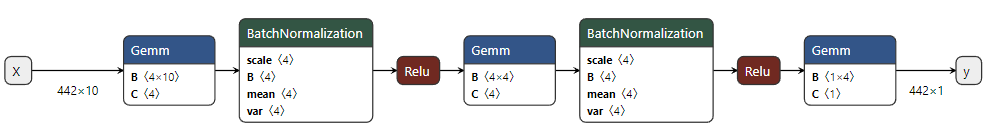

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

In [ ]:
X_np, y_np = load_diabetes(return_X_y=True)
X = torch.FloatTensor(X_np)
y = torch.FloatTensor(y_np).reshape(-1, 1)
y = (y - y.mean()) / y.std()

In [ ]:
class ModelWithoutBN(nn.Module):
    def __init__(self, n_in, n_hidden1, n_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(n_in, n_hidden1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden2, 1)
    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
class ModelWithBN(nn.Module):
    def __init__(self, n_in, n_hidden1, n_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(n_in, n_hidden1)
        self.bn1 = nn.BatchNorm1d(n_hidden1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden1, n_hidden2)
        self.bn2 = nn.BatchNorm1d(n_hidden2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden2, 1)
    def forward(self, x):
        x = self.act1(self.bn1(self.fc1(x)))
        x = self.act2(self.bn2(self.fc2(x)))
        x = self.fc3(x)
        return x

In [ ]:
learning_rates = [0.001, 0.01, 0.1]
use_bn_flags = [True, False]
n_epochs = 300
history = {}

In [ ]:
for use_bn in use_bn_flags:
    for lr in learning_rates:

        model_name = "With BN" if use_bn else "Without BN"
        run_name = f"{model_name}, lr={lr}"
        print(f"Обучение: {run_name}")
        if use_bn:
            model = ModelWithBN(X.shape[1], 4, 4)
        else:
            model = ModelWithoutBN(X.shape[1], 4, 4)

        optimizer = torch.optim.Adam(model.parameters(), lr=lr)
        criterion = nn.MSELoss()

        r2_history = []
        for epoch in range(n_epochs):
            model.train()
            outputs = model(X)
            loss = criterion(outputs, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            model.eval()
            with torch.no_grad():
                preds = model(X)
                r2 = r2_score(y.numpy(), preds.numpy())
                r2_history.append(r2)

        history[run_name] = r2_history

Обучение: With BN, lr=0.001
Обучение: With BN, lr=0.01
Обучение: With BN, lr=0.1
Обучение: Without BN, lr=0.001
Обучение: Without BN, lr=0.01
Обучение: Without BN, lr=0.1


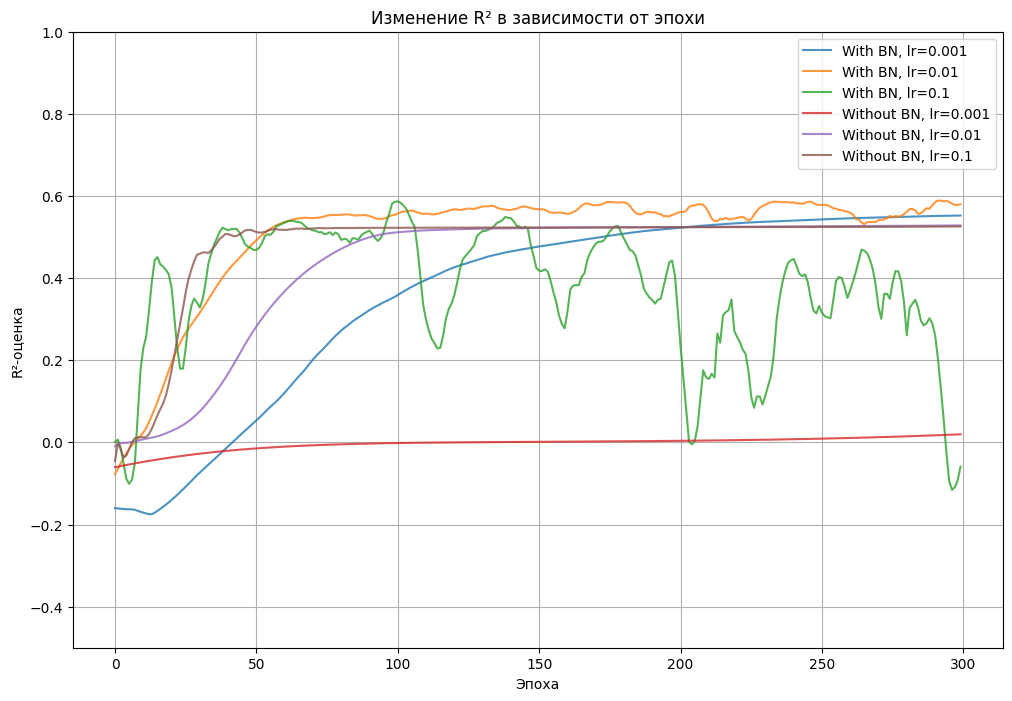

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

for name, r2_values in history.items():
    plt.plot(r2_values, label=name, alpha=0.8)

plt.title('Изменение R² в зависимости от эпохи')
plt.xlabel('Эпоха')
plt.ylabel('R²-оценка')
plt.legend()
plt.grid(True)
plt.ylim(-0.5, 1.0)
plt.show()

<p class="task" id="5"></p>

5\. Решите задачу регрессии c использованием различных алгоритмов градиентного спуска. Покажите, как меняется результат обучения моделей при использовании различных алгоритмов (Adam, Adagram, RMSProp, SGD) за одно и то же количество эпох с одной и той же скоростью обучения. Используйте модель с архитектурой, аналогичной модели из предыдущей задачи.

Визуализируйте график изменения значений MAPE в зависимости от эпохи при использовании различных алгоритмов градиентного спуска.

- [ ] Проверено на семинаре

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target
X_np, y_np = load_boston()
th = torch
X = th.FloatTensor(X_np)
y = th.FloatTensor(y_np).reshape(-1, 1)

X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3088296254.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
class SimpleRegressionNet(nn.Module):
    def __init__(self, n_in, n_hidden1, n_hidden2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_in, n_hidden1),
            nn.ReLU(),
            nn.Linear(n_hidden1, n_hidden2),
            nn.ReLU(),
            nn.Linear(n_hidden2, 1)
        )
    def forward(self, x):
        return self.net(x)

In [ ]:
learning_rate = 0.01
n_epochs = 400

optimizers_to_test = {
    'Adam': torch.optim.Adam,
    'Adagrad': torch.optim.Adagrad,
    'RMSProp': torch.optim.RMSprop,
    'SGD': torch.optim.SGD
}

history = {}

In [ ]:
for opt_name, opt_class in optimizers_to_test.items():
    print(f"Обучение с оптимизатором: {opt_name}")
    model = SimpleRegressionNet(X.shape[1], 16, 16)
    optimizer = opt_class(model.parameters(), lr=learning_rate)
    criterion = nn.L1Loss()
    mae_history = []
    for epoch in range(n_epochs):
        model.train()
        outputs = model(X)
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        mae_history.append(loss.item())

    history[opt_name] = mae_history

Обучение с оптимизатором: Adam
Обучение с оптимизатором: Adagrad
Обучение с оптимизатором: RMSProp
Обучение с оптимизатором: SGD


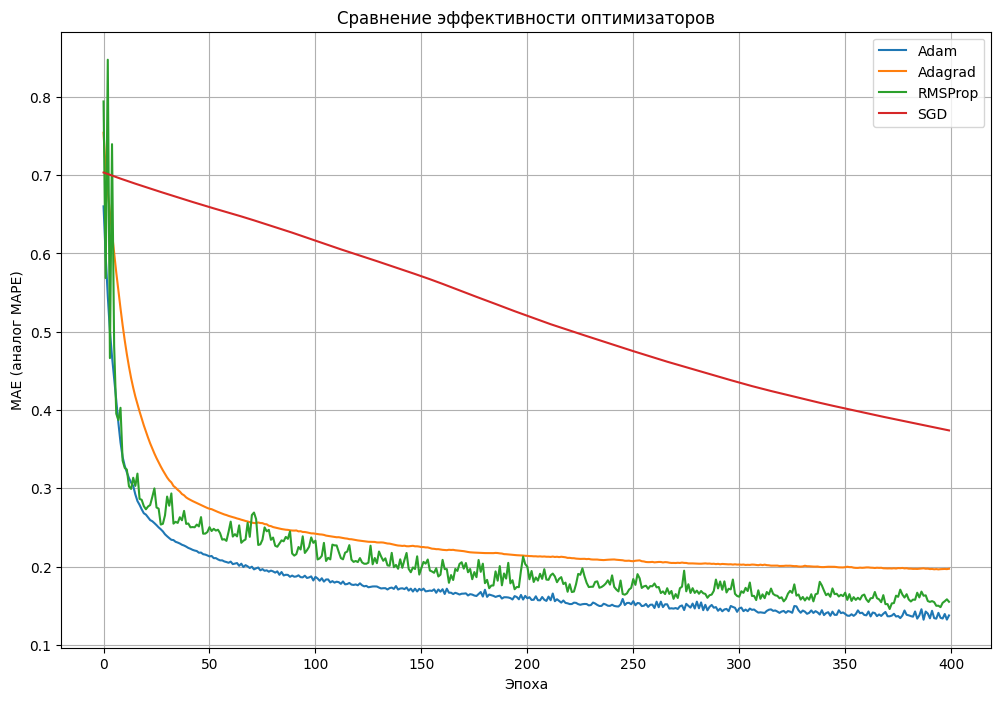

In [ ]:
plt.figure(figsize=(12, 8))

for name, mae_values in history.items():
    plt.plot(mae_values, label=name)

plt.title('Сравнение эффективности оптимизаторов')
plt.xlabel('Эпоха')
plt.ylabel('MAE (аналог MAPE)')
plt.legend()
plt.grid(True)
plt.show()

<p class="task" id="6"></p>

6\. Решите задачу регрессии c использованием ранней остановки. Разбейте набор данных на обучающую и валидационную выборку в соотношении 80 на 20. Остановите процесс обучения, если целевая метрика (MAPE) не уменьшалась в течении последних $k$ ($k$ - гиперпараметр метода) эпох. В момент остановки выведите сообщение с текущим номером эпохи.

- [ ] Проверено на семинаре

In [ ]:
X, y = load_boston()
X = th.FloatTensor(X)
y = th.FloatTensor(y).reshape(-1, 1)

In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, random_split, DataLoader

In [ ]:
def load_boston():
    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]
    return data, target

X_np, y_np = load_boston()
th = torch
X = th.FloatTensor(X_np)
y = th.FloatTensor(y_np).reshape(-1, 1)

X = (X - X.mean(axis=0)) / X.std(axis=0)
y = (y - y.mean()) / y.std()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3575616768.py:3: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [ ]:
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

generator = torch.Generator().manual_seed(42)
train_dataset, val_dataset = random_split(dataset, [train_size, val_size], generator=generator)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
X_val, y_val = val_dataset[:]

In [ ]:
class RegressionNet(nn.Module):
    def __init__(self, n_in, n_hidden):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_in, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, 1)
        )
    def forward(self, x):
        return self.net(x)

def mape_loss(y_pred, y_true):
    epsilon = 1e-8
    return torch.mean(torch.abs((y_true - y_pred) / (y_true + epsilon))) * 100

In [ ]:
model = RegressionNet(X.shape[1], 64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.L1Loss()

n_epochs = 1000
k = 20

best_val_mape = float('inf')
epochs_no_improve = 0

In [ ]:
for epoch in range(n_epochs):
    model.train()

    for X_batch, y_batch in train_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    model.eval()
    with torch.no_grad():
        val_preds = model(X_val)
        current_val_mape = mape_loss(val_preds, y_val)

    print(f"Эпоха {epoch + 1}: Валидационная MAPE = {current_val_mape:.2f}%")

    if current_val_mape < best_val_mape:
        best_val_mape = current_val_mape
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    if epochs_no_improve >= k:
        print(f"Ранняя остановка на эпохе: {epoch + 1}")
        print(f"Ошибка MAPE на валидации не улучшалась в течение {k} эпох.")
        print(f"Лучшая достигнутая MAPE: {best_val_mape:.2f}%")
        break

Эпоха 1: Валидационная MAPE = 144.98%
Эпоха 2: Валидационная MAPE = 146.92%
Эпоха 3: Валидационная MAPE = 141.16%
Эпоха 4: Валидационная MAPE = 115.52%
Эпоха 5: Валидационная MAPE = 106.66%
Эпоха 6: Валидационная MAPE = 103.59%
Эпоха 7: Валидационная MAPE = 107.98%
Эпоха 8: Валидационная MAPE = 114.26%
Эпоха 9: Валидационная MAPE = 104.45%
Эпоха 10: Валидационная MAPE = 115.85%
Эпоха 11: Валидационная MAPE = 109.62%
Эпоха 12: Валидационная MAPE = 122.06%
Эпоха 13: Валидационная MAPE = 108.06%
Эпоха 14: Валидационная MAPE = 102.65%
Эпоха 15: Валидационная MAPE = 122.91%
Эпоха 16: Валидационная MAPE = 109.36%
Эпоха 17: Валидационная MAPE = 113.31%
Эпоха 18: Валидационная MAPE = 118.40%
Эпоха 19: Валидационная MAPE = 136.20%
Эпоха 20: Валидационная MAPE = 127.91%
Эпоха 21: Валидационная MAPE = 120.57%
Эпоха 22: Валидационная MAPE = 123.68%
Эпоха 23: Валидационная MAPE = 120.40%
Эпоха 24: Валидационная MAPE = 117.60%
Эпоха 25: Валидационная MAPE = 133.16%
Эпоха 26: Валидационная MAPE = 126

## Обратная связь
- [ ] Хочу получить обратную связь по решению